In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, f1_score
)

In [2]:
DATA_DIR = "./dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
SEED = 42
EPOCHS = 30

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "test"),
    labels="inferred",
    label_mode="binary",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False
)

Found 6653 files belonging to 2 classes.



TEST SET RESULTS for model: ./models/best_cnn.h5

Classification Report:

              precision    recall  f1-score   support

         0.0     0.9347    0.8698    0.9011      3603
         1.0     0.8579    0.9282    0.8917      3050

    accuracy                         0.8966      6653
   macro avg     0.8963    0.8990    0.8964      6653
weighted avg     0.8995    0.8966    0.8968      6653

Confusion Matrix:
 [[3134  469]
 [ 219 2831]]
ROC AUC: 0.9712
F1 Score: 0.8917


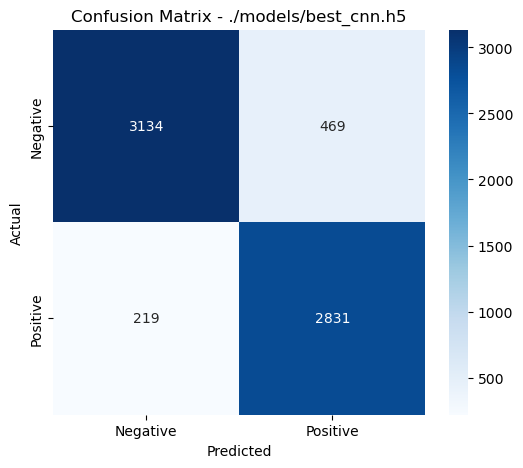


Confusion matrix saved to: ./models/best_cnn_confusion_matrix.png


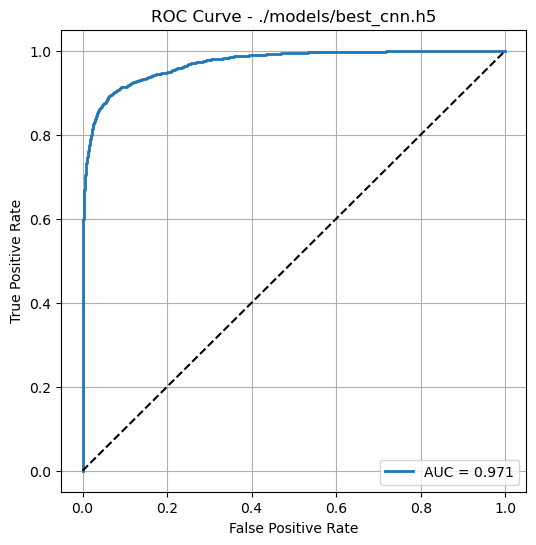

ROC curve saved to: ./models/best_cnn_roc_curve.png

Predictions saved to: ./models/best_cnn_test_predictions.npz

Evaluation complete!


In [3]:
# ----------------------------------------------------
# Load model
# ----------------------------------------------------
MODEL_PATH = "./models/best_cnn.h5"
model = tf.keras.models.load_model(MODEL_PATH)

# ----------------------------------------------------
# Evaluate on test set
# ----------------------------------------------------
y_true = []
y_pred_prob = []

for images, labels in test_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_pred_prob.extend(probs.tolist())
    y_true.extend(labels.numpy().tolist())

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred = (y_pred_prob >= 0.5).astype(int)

# ----------------------------------------------------
# Metrics
# ----------------------------------------------------
report = classification_report(y_true, y_pred, digits=4)
cm = confusion_matrix(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_prob)
f1 = f1_score(y_true, y_pred)

# Print nicely formatted results
print("\n" + "="*60)
print(f"TEST SET RESULTS for model: {MODEL_PATH}")
print("="*60)
print("\nClassification Report:\n")
print(report)
print("Confusion Matrix:\n", cm)
print(f"ROC AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("="*60)

# ----------------------------------------------------
# Save Confusion Matrix Image
# ----------------------------------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title(f"Confusion Matrix - {MODEL_PATH}")
plt.xlabel("Predicted")
plt.ylabel("Actual")

cm_path = MODEL_PATH.replace(".h5", "_confusion_matrix.png")
plt.savefig(cm_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"\nConfusion matrix saved to: {cm_path}")

# ----------------------------------------------------
# Save ROC Curve Image
# ----------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {MODEL_PATH}")
plt.legend()
plt.grid(True)

roc_path = MODEL_PATH.replace(".h5", "_roc_curve.png")
plt.savefig(roc_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"ROC curve saved to: {roc_path}")

# ----------------------------------------------------
# Save prediction arrays
# ----------------------------------------------------
npz_path = MODEL_PATH.replace(".h5", "_test_predictions.npz")
np.savez(npz_path, y_true=y_true, y_pred=y_pred, y_pred_prob=y_pred_prob)

print(f"\nPredictions saved to: {npz_path}")
print("\nEvaluation complete!")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6

TEST SET RESULTS for model: ./models/resnet50_final.h5

Classification Report:

              precision    recall  f1-score   support

         0.0     0.9662    0.9348    0.9502      3603
         1.0     0.9258    0.9613    0.9432      3050

    accuracy                         0.9469      6653
   macro avg     0.9460    0.9480    0.9467      6653
weighted avg     0.9477    0.9469    0.9470      6653

Confusion Matrix:
 [[3368  235]
 [ 118 2932]]
ROC AUC: 0.9922
F1 Score: 0.9432


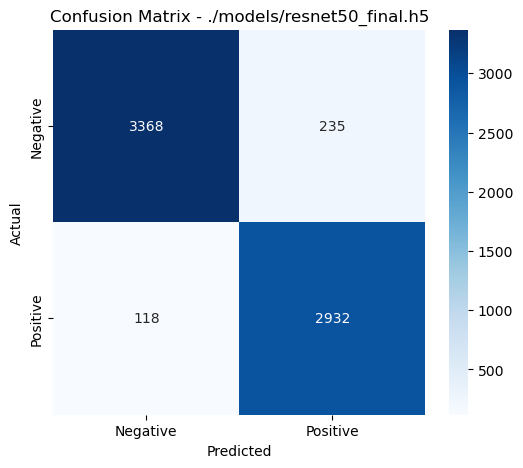


Confusion matrix saved to: ./models/resnet50_final_confusion_matrix.png


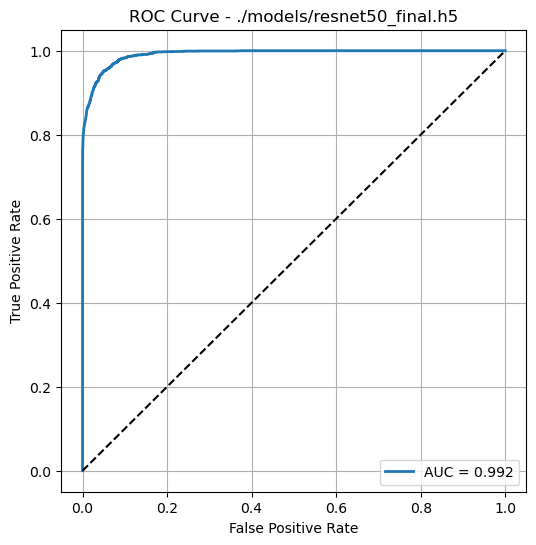

ROC curve saved to: ./models/resnet50_final_roc_curve.png

Predictions saved to: ./models/resnet50_final_test_predictions.npz

Evaluation complete!


In [4]:
# ----------------------------------------------------
# Load model
# ----------------------------------------------------
MODEL_PATH = "./models/resnet50_final.h5"
model = tf.keras.models.load_model(MODEL_PATH)

# ----------------------------------------------------
# Evaluate on test set
# ----------------------------------------------------
y_true = []
y_pred_prob = []

for images, labels in test_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_pred_prob.extend(probs.tolist())
    y_true.extend(labels.numpy().tolist())

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred = (y_pred_prob >= 0.5).astype(int)

# ----------------------------------------------------
# Metrics
# ----------------------------------------------------
report = classification_report(y_true, y_pred, digits=4)
cm = confusion_matrix(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_prob)
f1 = f1_score(y_true, y_pred)

# Print nicely formatted results
print("\n" + "="*60)
print(f"TEST SET RESULTS for model: {MODEL_PATH}")
print("="*60)
print("\nClassification Report:\n")
print(report)
print("Confusion Matrix:\n", cm)
print(f"ROC AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("="*60)

# ----------------------------------------------------
# Save Confusion Matrix Image
# ----------------------------------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title(f"Confusion Matrix - {MODEL_PATH}")
plt.xlabel("Predicted")
plt.ylabel("Actual")

cm_path = MODEL_PATH.replace(".h5", "_confusion_matrix.png")
plt.savefig(cm_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"\nConfusion matrix saved to: {cm_path}")

# ----------------------------------------------------
# Save ROC Curve Image
# ----------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {MODEL_PATH}")
plt.legend()
plt.grid(True)

roc_path = MODEL_PATH.replace(".h5", "_roc_curve.png")
plt.savefig(roc_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"ROC curve saved to: {roc_path}")

# ----------------------------------------------------
# Save prediction arrays
# ----------------------------------------------------
npz_path = MODEL_PATH.replace(".h5", "_test_predictions.npz")
np.savez(npz_path, y_true=y_true, y_pred=y_pred, y_pred_prob=y_pred_prob)

print(f"\nPredictions saved to: {npz_path}")
print("\nEvaluation complete!")